In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wrangle import split_data

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [62]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),1) for i in range(X.shape[1])]
    return(vif)

In [68]:
URL="https://www2.cs.arizona.edu/classes/cs120/fall17/ASSIGNMENTS/assg02/Pokemon.csv"
df = pd.read_csv(URL)
df = df.fillna(0)

In [69]:
id_ = df.pop('Name')
df = pd.get_dummies(df, drop_first=True)
df = pd.concat([id_, df],axis=1)
X_train, X_test, X_val, y_train, y_test, y_val = split_data(df, 'Total')

X_train, X_test, X_val, y_train, y_test, y_val
(559, 45) (120, 45) (121, 45) (559,) (120,) (121,)


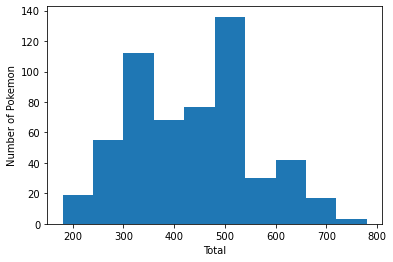

In [57]:
plt.hist(y_train)
plt.xlabel("Total")
plt.ylabel("Number of Pokemon")
plt.show()

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 60 to 462
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             559 non-null    object
 1   #                559 non-null    int64 
 2   HP               559 non-null    int64 
 3   Attack           559 non-null    int64 
 4   Defense          559 non-null    int64 
 5   Sp. Atk          559 non-null    int64 
 6   Sp. Def          559 non-null    int64 
 7   Speed            559 non-null    int64 
 8   Generation       559 non-null    int64 
 9   Legendary        559 non-null    bool  
 10  Type 1_Dark      559 non-null    uint8 
 11  Type 1_Dragon    559 non-null    uint8 
 12  Type 1_Electric  559 non-null    uint8 
 13  Type 1_Fairy     559 non-null    uint8 
 14  Type 1_Fighting  559 non-null    uint8 
 15  Type 1_Fire      559 non-null    uint8 
 16  Type 1_Flying    559 non-null    uint8 
 17  Type 1_Ghost     559 non-null    u

In [72]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

mean = y_train['Total'].mean()
y_train['mean'] = mean
y_val['mean'] = mean

median = y_train['Total'].median()
y_train['median'] = median
y_val['median'] = median

rmse_train = mean_squared_error(y_train.Total, y_train['mean'])**(1/2)
rmse_validate = mean_squared_error(y_val.Total, y_val['mean'])**(1/2)

print(mean, median)
print("\nRMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

rmse_train = mean_squared_error(y_train.Total, y_train['median'])**(1/2)
rmse_validate = mean_squared_error(y_val.Total, y_val['median'])**(1/2)

print("\nRMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

432.1180679785331 438.0

RMSE using Mean
Train/In-Sample:  118.56 
Validate/Out-of-Sample:  107.64

RMSE using Median
Train/In-Sample:  118.7 
Validate/Out-of-Sample:  107.82


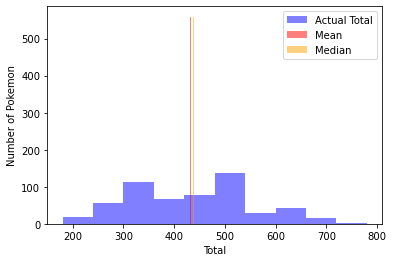

In [73]:
plt.hist(y_train.Total, color='blue', alpha=.5, label="Actual Total")
plt.hist(y_train['mean'], bins=1, color='red', alpha=.5, label="Mean")
plt.hist(y_train['median'], bins=1, color='orange', alpha=.5, label="Median")
plt.xlabel("Total")
plt.ylabel("Number of Pokemon")
plt.legend()
plt.show()

In [74]:
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train.iloc[:,1:], y_train.Total)

# predict train
y_train['pred_lm'] = lm.predict(X_train.iloc[:,1:])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Total, y_train.pred_lm)**(1/2)

# predict validate
y_val['pred_lm'] = lm.predict(X_val.iloc[:,1:])

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.Total, y_val.pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\n\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression

Training/In-Sample:  1.2314444368261594e-13 
Validation/Out-of-Sample:  1.211630297688539e-13


In [75]:
for alpha in [.01, .1, 1]:
    lars = LassoLars(alpha=alpha)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lars.fit(X_train.iloc[:,1:], y_train.Total)

    # predict train
    y_train['pred_lars'] = lars.predict(X_train.iloc[:,1:])

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.Total, y_train.pred_lars)**(1/2)

    # predict validate
    y_val['pred_lars'] = lars.predict(X_val.iloc[:,1:])

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_val.Total, y_val.pred_lars)**(1/2)

    print("RMSE for Lasso + Lars\n\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars

Training/In-Sample:  0.360013034680356 
Validation/Out-of-Sample:  0.3367300936460581
RMSE for Lasso + Lars

Training/In-Sample:  3.6001303468030135 
Validation/Out-of-Sample:  3.3673009364599857
RMSE for Lasso + Lars

Training/In-Sample:  36.00130346802957 
Validation/Out-of-Sample:  33.67300936459921


In [76]:
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train.iloc[:,1:], y_train.Total)

# predict train
y_train['pred_glm'] = glm.predict(X_train.iloc[:,1:])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Total, y_train.pred_glm)**(1/2)

# predict validate
y_val['pred_glm'] = glm.predict(X_val.iloc[:,1:])

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.Total, y_val.pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\n\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0

Training/In-Sample:  28.204540856926563 
Validation/Out-of-Sample:  26.659440035876536


In [79]:
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train.iloc[:,1:])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_val.iloc[:,1:])
X_test_degree2 = pf.transform(X_test.iloc[:,1:])

In [81]:
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.Total)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Total, y_train.pred_lm2)**(1/2)

# predict validate
y_val['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.Total, y_val.pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\n\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2

Training/In-Sample:  3.194945750865834e-13 
Validation/Out-of-Sample:  2.7428419145783458e-12


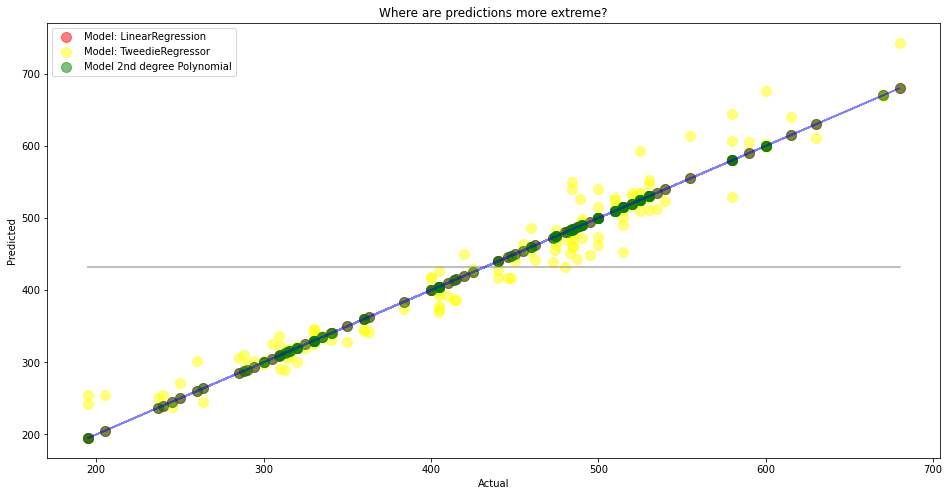

In [88]:
plt.figure(figsize=(16,8))
plt.plot(y_val.Total, y_val['mean'], alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_val.Total, y_val.Total, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_val.Total, y_val.pred_lm, alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_val.Total, y_val.pred_glm, alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_val.Total, y_val.pred_lm2, alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

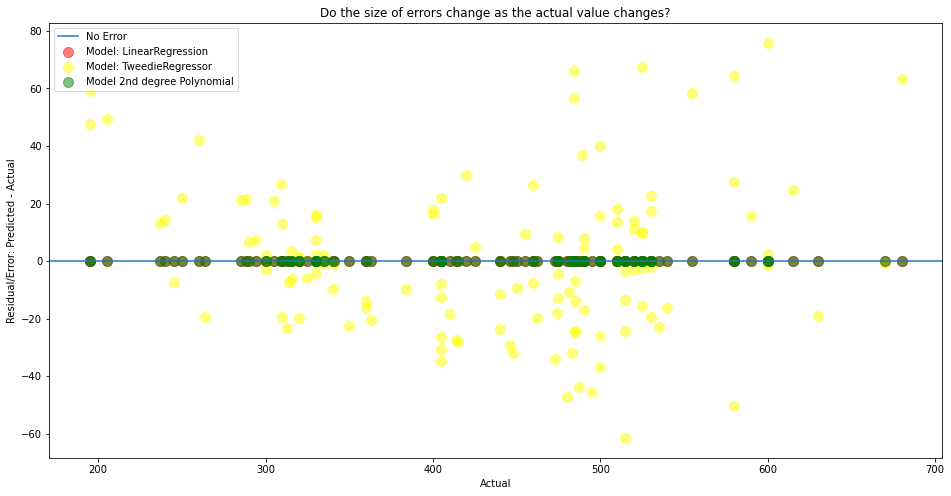

In [91]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_val.Total, y_val.pred_lm-y_val.Total, alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_val.Total, y_val.pred_glm-y_val.Total, alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_val.Total, y_val.pred_lm2-y_val.Total, alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Residual/Error: Predicted - Actual")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

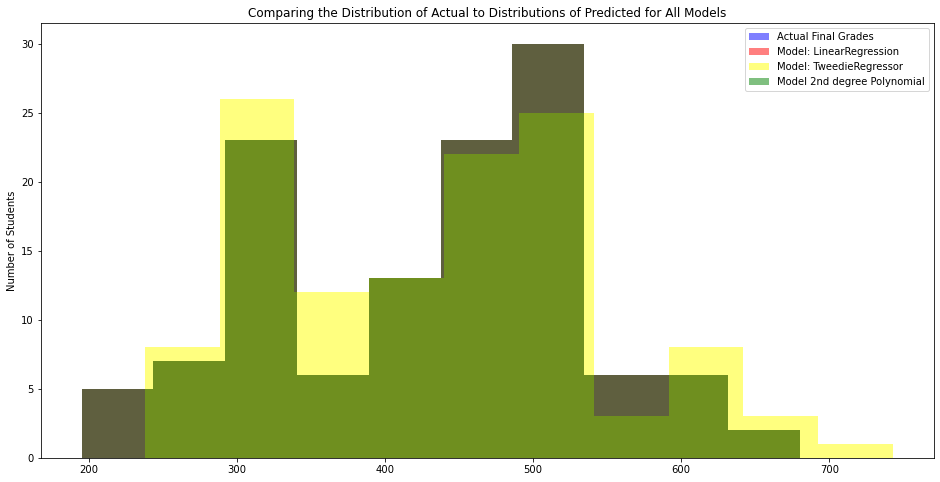

In [96]:
plt.figure(figsize=(16,8))
plt.hist(y_val.Total, color='blue', alpha=.5, label="Actual Final Grades")
plt.hist(y_val.pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_val.pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_val.pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("")
plt.ylabel("Number of Students")
plt.title("Comparing the Distribution of Actual to Distributions of Predicted for All Models")
plt.legend()
plt.show()

In [97]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['pred_lm'] = lm.predict(X_test.iloc[:,1:])

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Total, y_test.pred_lm)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  2.565758470257212
